# Simple output analysis of LPJ-GUESS modeling run

In [2]:
# receives data from snakemake
carbon_pools_file = 'lpjguess_outputs_chelsa-w5e5_1800arcsec_bavaria/cpool.out'
try:
    from snakemake.script import snakemake

    if snakemake.wildcards:
        print('Reading variables from snakemake variables')
        resolution = snakemake.wildcards['resolution']
        regionname = snakemake.wildcards['regionname']
        model = snakemake.wildcards['model']
        carbon_pools_file = f'lpjguess_outputs_{model}_{resolution}_{regionname}/cpool.out'
    else:
        print('running with defaults')
except ImportError as err:
    print('Not called from within snakemake')

Not called from within snakemake


In [11]:
import pandas as pd
import output_computations as comp

# Total Carbon Content

<Axes: xlabel='Year', ylabel='MtC'>

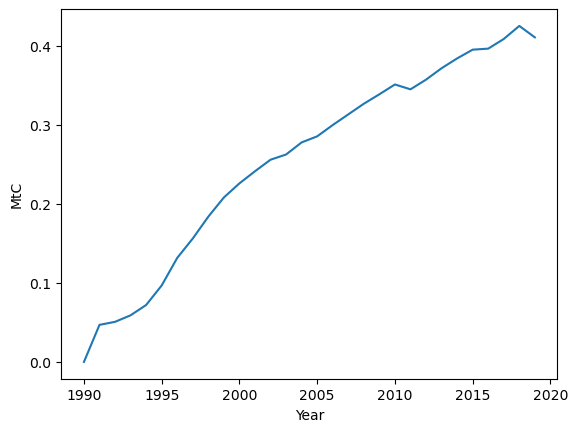

In [14]:
M2_TO_KM2 = 1_000_000
KG_TO_MT = 1_000_000
carbon_pool = pd.read_csv(carbon_pools_file, sep='\\s+').set_index(['Lon', 'Lat', 'Year'])
carbon_pool = comp.get_total_value_per_year(carbon_pool, variable_name='VegC') / (M2_TO_KM2 * KG_TO_MT)
carbon_pool.plot(x='Year', y='VegC', label='Vegetation Carbon', ylabel='MtC')

# Final Vegetation Carbon Content

This assumes the entire grid cells covered by vegetation.

In [17]:
carbon_pool.loc[2019]

0.41043372881701495